# Análise 1: MovieLens

Será utilizado um conjunto de dados oriundo do [MovieLens](https://movielens.org/), que trabalha com filmes e notas.

A versão baixada é a [small](http://grouplens.org/datasets/movielens). Data: 22 de março de 2023.

### Exploratory Data Analysis

In [ ]:
import pandas as pd

notas = pd.read_csv('ratings.csv')

Vamos visualizar os 5 primeiros elementos da tabela:

In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.shape

(100836, 4)

Estamos trabalhando com [Pandas do tipo Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), então vamos alterar o nome das colunas para o português. 

In [ ]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Análise das notas/avaliações:

Quando pedimos 1 coluna só, por padrão ela é uma série de números, e chamamos de [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

In [ ]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Valores das notas que foram dadas:

In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Quantas vezes foram dadas cada nota / frequência das notas:

In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

Média de todas as notas:

In [ ]:
notas['nota'].mean()

3.501556983616962

Vamos imprimir os primeiros 5 valores das notas na tela visualmente (no Pandas, temos o .plot().

In [ ]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

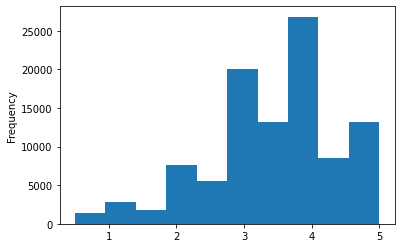

In [ ]:
 notas.nota.plot(kind='hist')

Mediana de todas as notas:

In [ ]:
notas.nota.median()

3.5

Pegar todas as medidas de uma vez só:

In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Vamos importar a biblioteca [Seaborn](https://seaborn.pydata.org/) para montar algumas visualizações:

<Axes: xlabel='nota'>

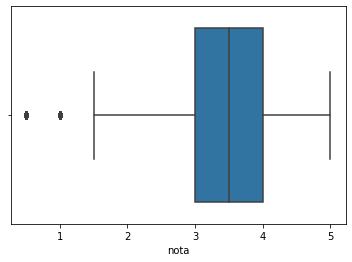

In [ ]:
import seaborn as sns

sns.boxplot(x=notas.nota)

Podemos concluir que metade das avaliações feitas estão entre as notas 3.0 e 4.0. E 25% está entre 4.0 e 5.0 e os outros 25% estão entre 1.0 e 3.0. As notas abaixo disso são dados raros.

### Análise dos filmes:

In [ ]:
filmes = pd.read_csv('movies.csv')

Vamos trocar o nome das colunas para o português e exibir somente os 5 primeiros títulos.

In [ ]:
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Vamos trabalhar com o filme "Toy Story", com Id número 1, fazendo uma pergunta (query).

In [ ]:
notas.query('filmeId==1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


### Análise das notas específicas por filme:

In [ ]:
notas.query('filmeId==1').nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

Média da nota do filme "Toy Story":

In [ ]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

Vamos agrupar o dataframe de notas com o meu dataframe de filmes.

In [ ]:
notas.groupby('filmeId')

Documentação do [GroupBy](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) do Pandas *(função que serve pra agrergar valores e calcular medidas)*.

In [ ]:
notas.groupby('filmeId').mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


Faz sentido a média do 'usuarioId'? E o momento médio? Não. Então vamos extrair somente a colina 'nota'.

In [ ]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']

medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

Os 5 primeiros filmes:

In [ ]:
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

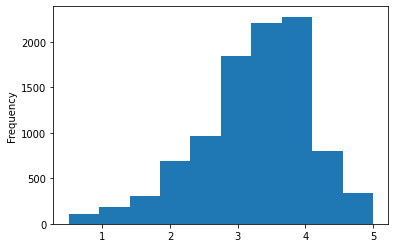

In [ ]:
medias_por_filme.plot(kind='hist')

<Axes: xlabel='nota'>

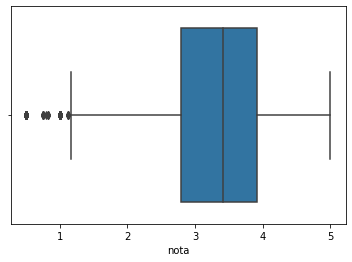

In [ ]:
sns.boxplot(x=medias_por_filme)

In [ ]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

Atenção: os valores são diferentes pois não estamos falando das notas em geral, e sim das avaliações da média de um filme. 

Também da pra fazer histograma com o Seaborn e boxplot com o Pandas. 

<ipython-input-26-c99e5fbcf4e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme)


<Axes: xlabel='nota', ylabel='Density'>

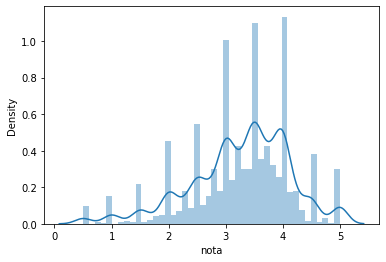

In [ ]:
sns.distplot(medias_por_filme)

Posso escolher quantas caixinhas (*bins*) eu quero que apareça no histograma.

<ipython-input-27-5bf8cca2d6c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins=10)


<Axes: xlabel='nota', ylabel='Density'>

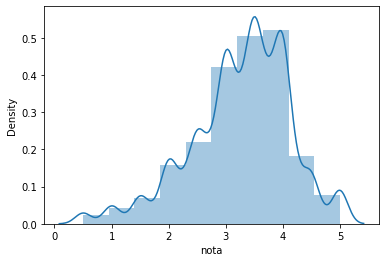

In [ ]:
sns.distplot(medias_por_filme, bins=10)

Biblioteca de "baixo nível" que o Pandas e o Seaborn usam para plotar os grágicos: [matplotlib](https://matplotlib.org/stable/tutorials/index.html).

Text(0.5, 1.0, 'Histograma das médias dos filmes')

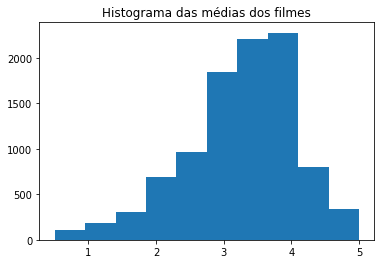

In [ ]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')

# Análise 2: TMDB

Agora utilizaremos o conjunto TMDB 5000 Movie Dataset, um dataset hospedado no [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata), com informações sobre 5000 filmes.

In [ ]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Linguagem dos filmes:

In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

Transformando em série:

In [ ]:
contagem_de_linguas = tmdb['original_language'].value_counts()
contagem_de_linguas

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

### Transformando uma série em um dataframe:

In [ ]:
contagem_de_linguas = tmdb['original_language'].value_counts().to_frame()
contagem_de_linguas

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


Adicionando índice e alterando o nome das colunas:

In [ ]:
contagem_de_linguas = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ['original_language', "total"]
contagem_de_linguas

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [ ]:
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


Usando[ plots de categorias da Seaborn](https://seaborn.pydata.org/tutorial/categorical.html):

<Axes: xlabel='original_language', ylabel='total'>

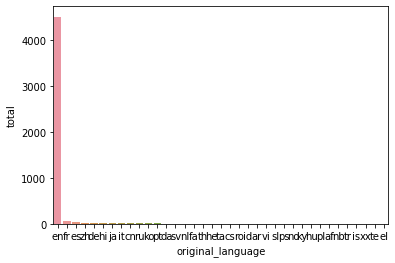

In [ ]:
sns.barplot(x = 'original_language', y = 'total', data = contagem_de_linguas)

Um jeito mais "direto" de plotar o gráfico de categorias:

In [ ]:
!pip install seaborn
import seaborn as sns
print(sns.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0.12.2


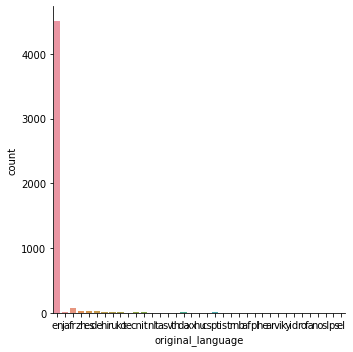

In [ ]:
sns.catplot(x = 'original_language', kind = 'count', data = tmdb)

Exploramos os dados e descobrimos que o idioma inglês tem destaque, mas precisamos lembrar que: em visualização de dados, nós queremos passar uma mensagem com os gráficos, que seja clara e transparente. 

Vamos comprar o inglês com as outras línguas:

In [ ]:
total_por_lingua = tmdb['original_language'].value_counts()
total_por_lingua

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [ ]:
total_de_ingles = total_por_lingua.loc['en']
total_de_ingles

4505

In [ ]:
total_geral = total_por_lingua.sum()
total_geral

4803

In [ ]:
total_resto = total_geral - total_de_ingles
total_resto

298

### Criando um dicionário do Python para então criar um dataframe comparando a quantidade de filmes no idioma inglês com os outros idiomas.

In [ ]:
dados = {
    'lingua': ['inglês', 'outros'],
    'total': [total_de_ingles, total_resto]
}
print(dados)

{'lingua': ['inglês', 'outros'], 'total': [4505, 298]}


In [ ]:
pd.DataFrame(dados)

,lingua,total
0,inglês,4505
1,outros,298


<Axes: >

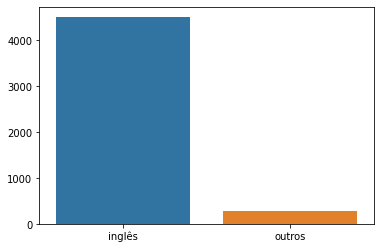

In [ ]:
sns.barplot(x = 'lingua', y = 'total', data = dados)

Explorando os outros idiomas...

Filmes em que a língua original é **diferente** do inglês:

In [ ]:
filmes_outras_linguas = tmdb.query("original_language != 'en'")
filmes_outras_linguas

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

In [ ]:
total_por_lingua_outros = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_outros

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

Gráfico mostrando a importância relativa entre outras línguas:

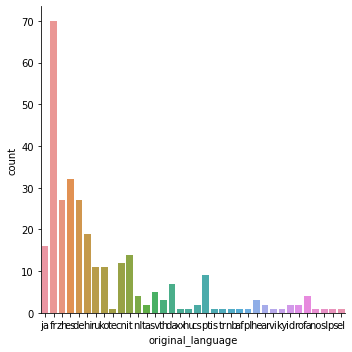

In [ ]:
filmes_outras_linguas = tmdb.query("original_language != 'en'")
sns.catplot(x = 'original_language', kind='count', data = filmes_outras_linguas)

### Refinando as visualizações...

Trabalhando com a [paleta de cores](https://seaborn.pydata.org/tutorial/color_palettes.html) no gráfico Seaborn:

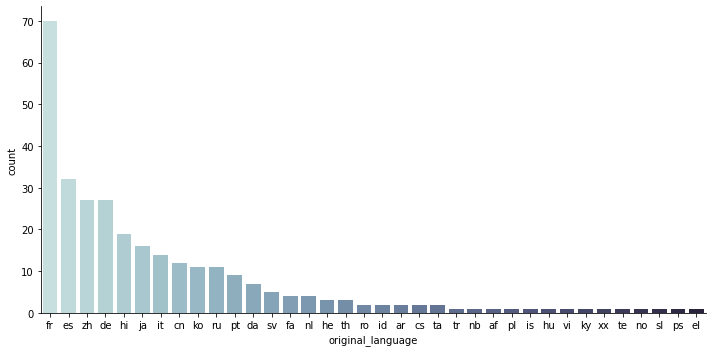

In [ ]:
filmes_outras_linguas = tmdb.query("original_language != 'en'")
sns.catplot(x = 'original_language', kind='count', data = filmes_outras_linguas,
            aspect = 2,
            palette = "ch:start=.2,rot=-.3",
            order = total_por_lingua_outros.index)

# Análise 3: Dados Estatísticos

In [ ]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Analisando as notas de "Toy Story" e "Jumanji":

In [ ]:
notas_toystory = notas.query('filmeId == 1')
notas_jumanji = notas.query('filmeId == 2')

In [ ]:
notas_toystory

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
notas_jumanji

,usuarioId,filmeId,nota,momento
560,6,2,4.0,845553522
1026,8,2,4.0,839463806
1773,18,2,3.0,1455617462
2275,19,2,3.0,965704331
2977,20,2,3.0,1054038313
...,...,...,...,...
95102,600,2,4.0,1237764627
95965,602,2,4.0,840875851
97044,604,2,5.0,832080293
97144,605,2,3.5,1277176522


Quantidade total de notas de cada filme:

In [ ]:
print(len(notas_toystory), len(notas_jumanji))

215 110


Médias:

In [ ]:
media_toystory = notas_toystory.nota.mean()
media_toystory

3.9209302325581397

In [ ]:
media_jumanji = notas_jumanji.nota.mean()
media_jumanji

3.4318181818181817

In [ ]:
print("Nota média do filme Toy Story = %.2f" % notas_toystory.nota.mean())
print("Nota média do filme Jumanji = %.2f" % notas_jumanji.nota.mean())

Nota média do filme Toy Story = 3.92
Nota média do filme Jumanji = 3.43


Medianas:

In [ ]:
print("Mediana do filme Toy Story = %.2f" % notas_toystory.nota.median())
print("Mediana do filme Jumanji = %.2f" % notas_jumanji.nota.median())

Mediana do filme Toy Story = 4.00
Mediana do filme Jumanji = 3.50


Plotando gráficos...

<Axes: xlabel='nota'>

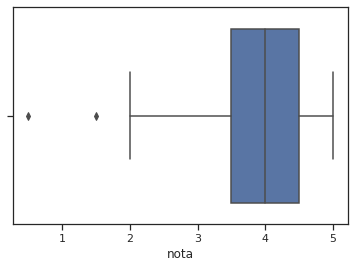

In [ ]:
sns.boxplot(x=notas_toystory.nota)

<Axes: xlabel='nota'>

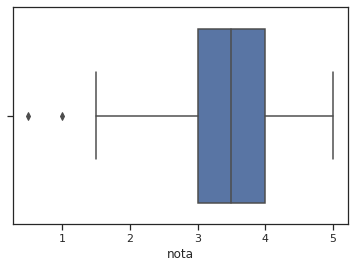

In [ ]:
sns.boxplot(x=notas_jumanji.nota)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe2a99497f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe2a994f8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe2a9949970>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe2a994fa60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe2a994fc10>,
 'means': []}

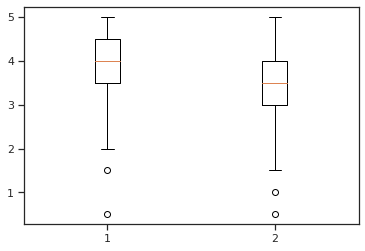

In [ ]:
plt.boxplot([notas_toystory.nota, notas_jumanji.nota])

Observamos que apesar da média e mediana serem parecidas, os filmes apresentam **dispersões** diferentes.

<Axes: xlabel='filmeId', ylabel='nota'>

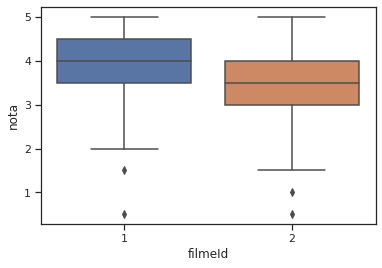

In [ ]:
sns.boxplot(x = 'filmeId', y = 'nota', data = notas.query('filmeId in [1, 2]'))

Desvio padrão:

In [ ]:
notas_toystory.nota.std()

0.8348591407114047

In [ ]:
notas_jumanji.nota.std()

0.8817134921476455

O **desvio padrão** vai nos dizer o quanto os dados fogem de uma tendência central.